# Hit the road, Jack!
## Heavy traffic indicators for Highway I-94

![banner](https://static.dw.com/image/40916907_605.jpg)

## Abstract

A common trait of the city life is road traffic. Looking at the data for I94 connecting St Paul to Minneapolis, we look into what influences traffic in this region. We could infer that:

* Traffic is over 3x heavier comparing day and night times (people commuting);
* Traffic during week days is 25% heavier than traffic on weekends. During the nights, weekends are actually heavier on traffic than weekdays;
* Holidays reduce traffic on I94 around 25%;
* Vacation period doesn't actually influence the patterns of traffic in I94, either by day or night.
* When it snows there is usually 16% less traffic than other weather conditions, other than that, ir doesn't vary much regardless of rain of limited visibility.

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and transformation**](#section5)       
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>


Urbanization is the phenomenon observed in the 20th century where population concentrated heavily in cities comming from the countryside. There are many consequences to this shift, but one of the most notorious one is, without a doubt, the invention of traffic:  folks heading towards the same direction suddenly find themselves stuck on their way, and losing lots of time and money.

Being able to identify traffic indicators can lead to optimizing moves by municipalities in order to ease traffic without hardware interventions on its infrastructure. It also allows for better planning for citizens, avoiding the rush hours on the road.

## 2. Goals and limitations<a name="section2"></a>

We will look into the westbound dataset of I-94, midway between Minneapolis and St. Paul to determine some heavy traffic indicators in time and weather:

* How does traffic vary between day time and night time?
* How does traffic vary through the year?
* How does traffic vary through the days fo the week?
* What is the impact of holidays on traffic?
* What is the impact of vacation on traffic?
* Which weather conditions impact traffic the most?

Limitations:

* the precipitation data in very inaccurate/inexistent, preventing a most valuable insight regarding rain and snow;
* low quality weather registers: on duplicated entries, the weather data can be different for the same datetime object
* clouds_all and weather_main are sometimes incompatible: how can there be 'rain', 'fog', 'snow', thunderstorm' with 0%, 1% of clouds in the skies?

## 3. Methodology<a name="section3"></a>

To measure traffic correlation, we will group the available data into time and weather values and compare it to observed traffic.We will proceed to analyze the data with pandas and numpy libraries, trying to spot patterns, common qualifiers and outliers with visualization tools (mostly heatmaps and matplotlib).

## 4. Metadata<a name="section4"></a>

The data, obtained from [UCL](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume), is comprised of:

* holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
* temp: Numeric Average temp in kelvin
* rain_1h: Numeric Amount in mm of rain that occurred in the hour
* snow_1h: Numeric Amount in mm of snow that occurred in the hour
* clouds_al:l Numeric Percentage of cloud cover
* weather_main: Categorical Short textual description of the current weather
* weather_description: Categorical Longer textual description of the current weather
* date_time: DateTime Hour of the data collected in local CST time
* traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## 5. Data Exploration and Transformation<a name="section5"></a>
* (1): Check for data type;
* (2): missing/repeated data
* (3): most common qualifiers;
* (4): unwanted columns and reasonableness

In [1]:
#(1) Check for datatype
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
from csv import reader

plt.style.use('fivethirtyeight')
sns.set(style='darkgrid')

i94 = pd.read_csv('i94.csv', na_values='None' )
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
i94.head(7)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584


In [3]:
#(1) check for datatype
for col in i94.columns:
    print(col, ': \n', i94[col].value_counts(ascending=False).head(15))
    print('----')

holiday : 
 Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: holiday, dtype: int64
----
temp : 
 274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
271.150     70
272.150     69
292.150     64
276.150     63
287.150     63
274.650     61
296.150     59
275.220     59
270.150     58
286.150     57
Name: temp, dtype: int64
----
rain_1h : 
 0.00    44737
0.25      948
0.51      256
1.02      123
0.30      121
0.76      109
0.38       99
1.78       91
1.52       69
0.64       55
1.27       50
0.60       32
2.79       29
0.44       26
0.89       25
Name: rain_1h, dtype: int64
----
snow_1h : 
 0.00    48141
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6

In [4]:
#(1) check for datatype 
i94.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [5]:
#weather_main, weather_description, holiday

list_str = ['weather_main', 'weather_description', 'holiday']
for c in list_str:
    i94[c] = i94[c].str.lower()
    
i94[list_str]

,weather_main,weather_description,holiday
0,clouds,scattered clouds,NaN
1,clouds,broken clouds,NaN
2,clouds,overcast clouds,NaN
3,clouds,overcast clouds,NaN
4,clouds,broken clouds,NaN
...,...,...,...
48199,clouds,broken clouds,NaN
48200,clouds,overcast clouds,NaN
48201,thunderstorm,proximity thunderstorm,NaN
48202,clouds,overcast clouds,NaN


Text(0.5, 0, 'Temp (k)')

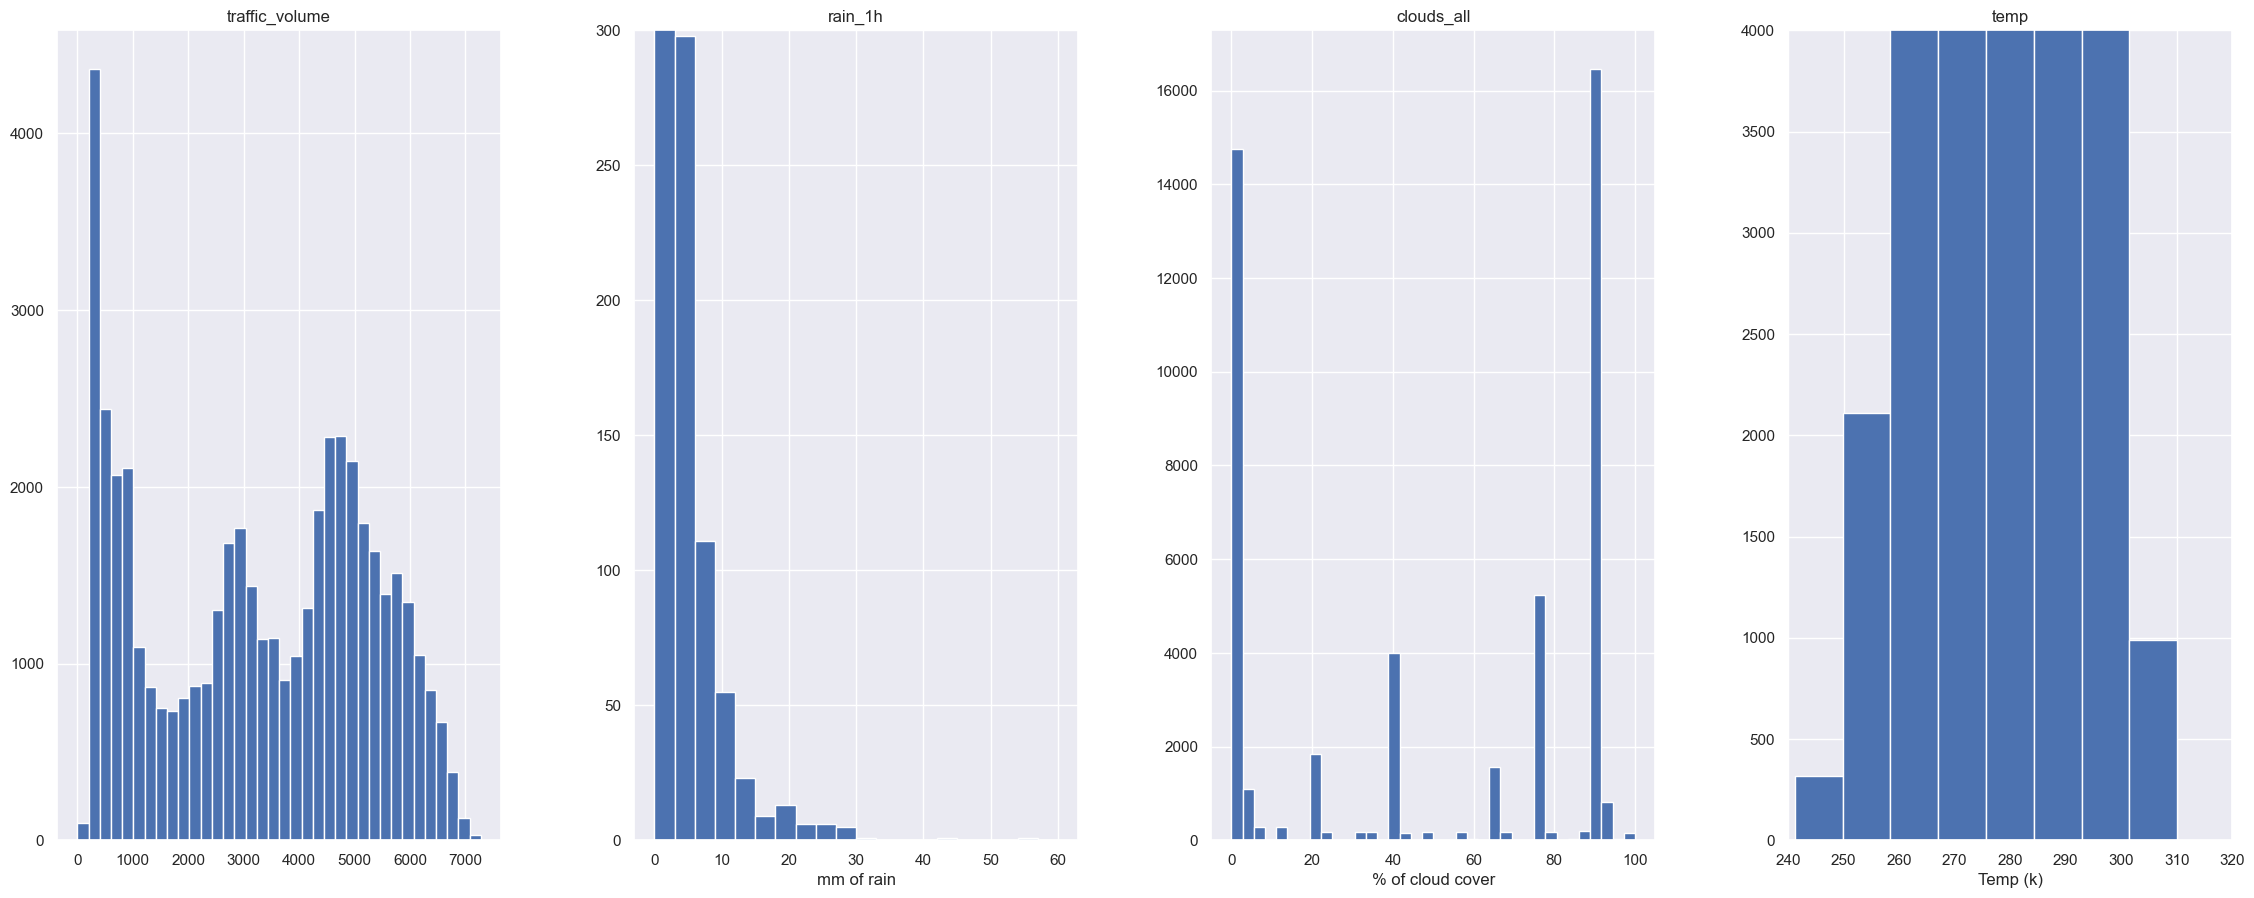

In [6]:
#(1) check for datatype:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(25,10))
# ax1.hist(bins=36, height=i94['traffic_volume'])
pd.DataFrame(i94['traffic_volume']).hist('traffic_volume', bins=36, ax=ax1)
pd.DataFrame(i94['rain_1h']).hist('rain_1h', range=(0,60), bins=20, ax=ax2)
ax2.set_xlabel('mm of rain')
ax2.set_ylim([0,300])
pd.DataFrame(i94['clouds_all']).hist('clouds_all', bins=36, ax=ax3)
ax3.set_xlabel('% of cloud cover')
pd.DataFrame(i94['temp']).hist('temp', bins=36, ax=ax4)
ax4.set_ylim([0, 4000])
ax4.set_xlim([240,320])
ax4.set_xlabel('Temp (k)')

<Axes: >

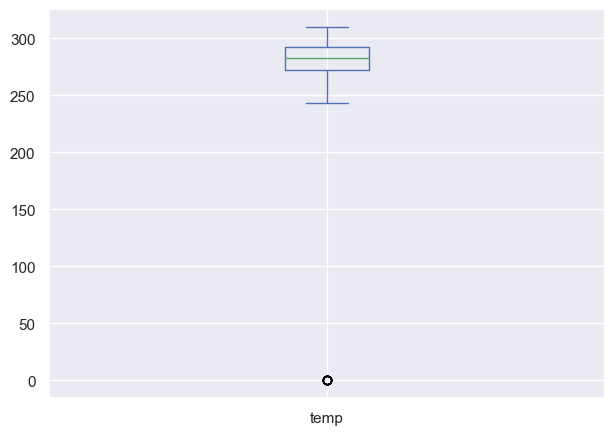

In [7]:
i94['temp'].plot(kind='box')

* (1)date_time should be datetime object, enabling visualization over time; 
* (2)temp min is ludicrous: it seems like only one entry is out of line;
* (3)rain_1h max is ludicrous;
* About 25% of the time, the traffic is below 1193: this is probably during the night time. About 25% of the time, the traffic was more than thrice greater, at 4933 cars or more.

In [8]:
#(1).1 date_time should be datetime objects
i94['date_time']=i94['date_time'].apply(pd.to_datetime)
i94['date']=i94['date_time'].dt.date

In [9]:
#(1).2 temp min is ludicrous
i94[i94['temp']==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
11898,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-01-31 03:00:00,361,2014-01-31
11899,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-01-31 04:00:00,734,2014-01-31
11900,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-01-31 05:00:00,2557,2014-01-31
11901,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-01-31 06:00:00,5150,2014-01-31
11946,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-02-02 03:00:00,291,2014-02-02
11947,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-02-02 04:00:00,284,2014-02-02
11948,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-02-02 05:00:00,434,2014-02-02
11949,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-02-02 06:00:00,739,2014-02-02
11950,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-02-02 07:00:00,962,2014-02-02
11951,NaN,0.0,0.0,0.0,0,clear,sky is clear,2014-02-02 08:00:00,1670,2014-02-02


It seems that indeed the thermometer was broken between Jan 31st, 2014 - Feb 2nd, 2014

In [10]:
#(1).2 temp min is ludicrous
i94=i94[i94['temp']!=0]

In [11]:
#(1).3 rain_1h max is ludicrous;
i94['rain_1h'].value_counts().sort_index(ascending=False)

9831.30        1
55.63          1
44.45          1
31.75          1
28.70          2
           ...  
0.28          23
0.27           5
0.26           2
0.25         948
0.00       44727
Name: rain_1h, Length: 372, dtype: int64

In [12]:
#(1) (3)rain_1h max is ludicrous;
i94[i94['rain_1h']==i94['rain_1h'].max()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
24872,NaN,302.11,9831.3,0.0,75,rain,very heavy rain,2016-07-11 17:00:00,5535,2016-07-11


In [13]:
#(1).3 rain_1h max is ludicrous;
i94= i94.drop([24872])

Text(0.5, 0.7093749999999819, 'Columns')

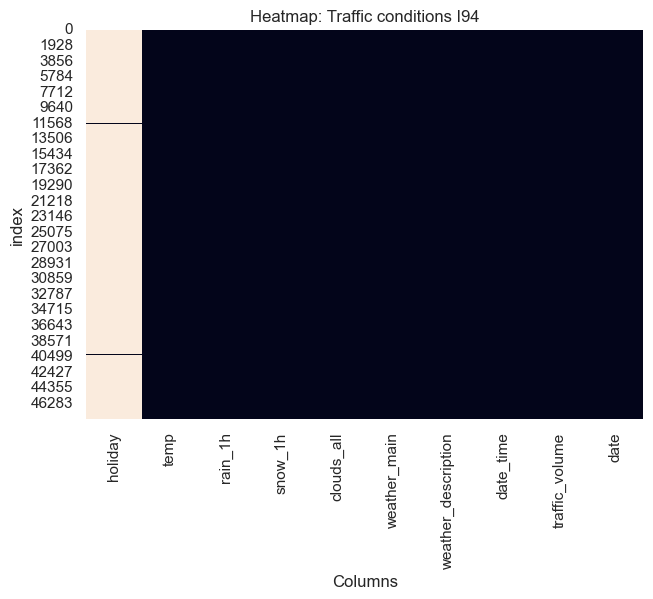

In [14]:
# (2): missing/repeated data
sns.heatmap(i94.isnull(), cbar=False)
plt.title('Heatmap: Traffic conditions I94')
plt.ylabel('index')
plt.xlabel('Columns')

Apparently, no missing data in all 48000 rows.

In [15]:
duplicates_i94=i94.duplicated()
i94[duplicates_i94]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
18697,NaN,286.290,0.0,0.0,1,clear,sky is clear,2015-09-30 19:00:00,3679,2015-09-30
23851,NaN,289.060,0.0,0.0,90,clouds,overcast clouds,2016-06-01 10:00:00,4831,2016-06-01
26784,NaN,289.775,0.0,0.0,56,clouds,broken clouds,2016-09-21 15:00:00,5365,2016-09-21
26980,NaN,287.860,0.0,0.0,0,clear,sky is clear,2016-09-29 19:00:00,3435,2016-09-29
27171,NaN,279.287,0.0,0.0,56,clouds,broken clouds,2016-10-07 18:00:00,4642,2016-10-07
28879,NaN,267.890,0.0,0.0,90,snow,light snow,2016-12-06 18:00:00,4520,2016-12-06
29268,NaN,254.220,0.0,0.0,1,clear,sky is clear,2016-12-19 00:00:00,420,2016-12-19
34711,NaN,295.010,0.0,0.0,40,clouds,scattered clouds,2017-06-21 11:00:00,4808,2017-06-21
34967,NaN,292.840,0.0,0.0,1,clear,sky is clear,2017-06-30 10:00:00,4638,2017-06-30
34969,NaN,294.520,0.0,0.0,1,clear,sky is clear,2017-06-30 11:00:00,4725,2017-06-30


There are 17 repeated rows in the whole dataset, not bad.

In [16]:
#(2) date duplicates

duplicates_date = i94.duplicated('date_time')
i94[duplicates_date]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
179,NaN,281.25,0.0,0.0,99,drizzle,light intensity drizzle,2012-10-10 07:00:00,6793,2012-10-10
181,NaN,280.10,0.0,0.0,99,drizzle,light intensity drizzle,2012-10-10 08:00:00,6283,2012-10-10
183,NaN,279.61,0.0,0.0,99,drizzle,light intensity drizzle,2012-10-10 09:00:00,5680,2012-10-10
270,NaN,282.43,0.0,0.0,57,mist,mist,2012-10-14 09:00:00,2685,2012-10-14
271,NaN,282.43,0.0,0.0,57,haze,haze,2012-10-14 09:00:00,2685,2012-10-14
...,...,...,...,...,...,...,...,...,...,...
48072,NaN,284.25,0.0,0.0,90,drizzle,light intensity drizzle,2018-09-25 16:00:00,6597,2018-09-25
48112,NaN,285.17,0.0,0.0,90,drizzle,light intensity drizzle,2018-09-27 07:00:00,6589,2018-09-27
48173,NaN,280.68,0.0,0.0,90,clouds,overcast clouds,2018-09-29 19:00:00,3818,2018-09-29
48193,NaN,283.48,0.0,0.0,90,drizzle,light intensity drizzle,2018-09-30 14:00:00,4380,2018-09-30


There are, however, 7629 duplicated date_time values (16%). This might indicate poor equipment reading or logging.

In [17]:
#(2) date duplicates
i94[duplicates_date]['date_time'].value_counts(ascending=False)

2013-04-18 22:00:00    5
2013-05-19 10:00:00    5
2018-04-13 21:00:00    4
2012-12-16 09:00:00    4
2017-11-05 01:00:00    4
                      ..
2016-03-14 10:00:00    1
2016-03-14 13:00:00    1
2016-03-14 15:00:00    1
2016-03-14 17:00:00    1
2018-09-30 15:00:00    1
Name: date_time, Length: 5445, dtype: int64

In [18]:
#(2) date duplicates sample
for i in range(10):
    print(i94[i94['date_time']==i94[duplicates_date]['date_time'].value_counts().index[i]])
    print('----------')
    
    

     holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
5249     NaN  274.79      0.0      0.0          90         mist   
5250     NaN  274.79      0.0      0.0          90      drizzle   
5251     NaN  274.79      0.0      0.0          90         rain   
5252     NaN  274.79      0.0      0.0          90         rain   
5253     NaN  274.79      0.0      0.0          90         snow   
5254     NaN  274.79      0.0      0.0          90         snow   

          weather_description           date_time  traffic_volume        date  
5249                     mist 2013-04-18 22:00:00            1532  2013-04-18  
5250  light intensity drizzle 2013-04-18 22:00:00            1532  2013-04-18  
5251               light rain 2013-04-18 22:00:00            1532  2013-04-18  
5252            moderate rain 2013-04-18 22:00:00            1532  2013-04-18  
5253               heavy snow 2013-04-18 22:00:00            1532  2013-04-18  
5254                     snow 2013-04-18 22:00:00 

No apparent way to decide which repeated value should remain: difference seems to be only on weather data. Let's say we keep the first.

In [19]:
i94_uniques = i94.drop_duplicates(['date_time'], keep='first')
i94_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40564 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              53 non-null     object        
 1   temp                 40564 non-null  float64       
 2   rain_1h              40564 non-null  float64       
 3   snow_1h              40564 non-null  float64       
 4   clouds_all           40564 non-null  int64         
 5   weather_main         40564 non-null  object        
 6   weather_description  40564 non-null  object        
 7   date_time            40564 non-null  datetime64[ns]
 8   traffic_volume       40564 non-null  int64         
 9   date                 40564 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 3.4+ MB


In [20]:
#(3) most common qualifiers
print(i94_uniques['date_time'].min(), '...', i94_uniques['date_time'].max())

2012-10-02 09:00:00 ... 2018-09-30 23:00:00


Data was gathered from October 2012 to September 2018.

In [21]:
# (4) unwanted columns and reasonableness
i94_uniques['rain_1h'].mean()
#plt.plo)t(data=i94['rain_1h'].value_counts().sort_index(), kind='bar')

0.0763531702987871

In [22]:
# (4) unwanted cols/rows, reasonableness:
i94_uniques['snow_1h'].mean()

0.00011734542944482792

In [23]:
# (4) unwanted cols/rows: 
#indication of a minor gap in this interval
i94_uniques.loc[19150:19162]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
19150,NaN,283.98,0.0,0.0,90,rain,moderate rain,2015-10-23 05:00:00,2589,2015-10-23
19151,NaN,284.00,0.0,0.0,90,rain,light rain,2015-10-23 06:00:00,5525,2015-10-23
19152,NaN,283.29,0.0,0.0,90,rain,heavy intensity rain,2015-10-23 07:00:00,5776,2015-10-23
19153,NaN,282.36,0.0,0.0,90,drizzle,light intensity drizzle,2015-10-23 09:00:00,4961,2015-10-23
19155,NaN,282.61,0.0,0.0,90,rain,light rain,2015-10-23 10:00:00,4667,2015-10-23
19157,NaN,282.61,0.0,0.0,90,rain,moderate rain,2015-10-23 11:00:00,5013,2015-10-23
19159,NaN,281.75,0.0,0.0,1,clear,sky is clear,2015-10-27 08:00:00,5957,2015-10-27
19160,NaN,282.58,0.0,0.0,1,clear,sky is clear,2015-10-27 10:00:00,4549,2015-10-27
19161,NaN,284.21,0.0,0.0,90,clouds,overcast clouds,2015-10-27 12:00:00,4780,2015-10-27
19162,NaN,285.36,0.0,0.0,1,clear,sky is clear,2015-10-27 13:00:00,4781,2015-10-27


In [24]:
# (4) unwanted cols/rows, reasonableness: according to https://en.wikipedia.org/wiki/Climate_of_Minneapolis%E2%80%93Saint_Paul
rain_monthly_avg=(23+22+43+74+99+116+103+110+77+66+41+30+803)/12
snow_monthly_avg=(28+24+21+8.9+17+29+130)/12
rain_hour_avg=rain_monthly_avg/30/24
snow_hour_avg=snow_monthly_avg/30/24
print(rain_hour_avg, snow_hour_avg)

0.18599537037037037 0.029849537037037032


We can see the rain data is roughly 2/3 of the [official state average](https://en.wikipedia.org/wiki/Climate_of_Minneapolis%E2%80%93Saint_Paul), whereas snow is 1% of the official data. We will keep the rain data, but throw away the snow one as invalid.

Text(0.5, 1.0, 'Snow mm over time')

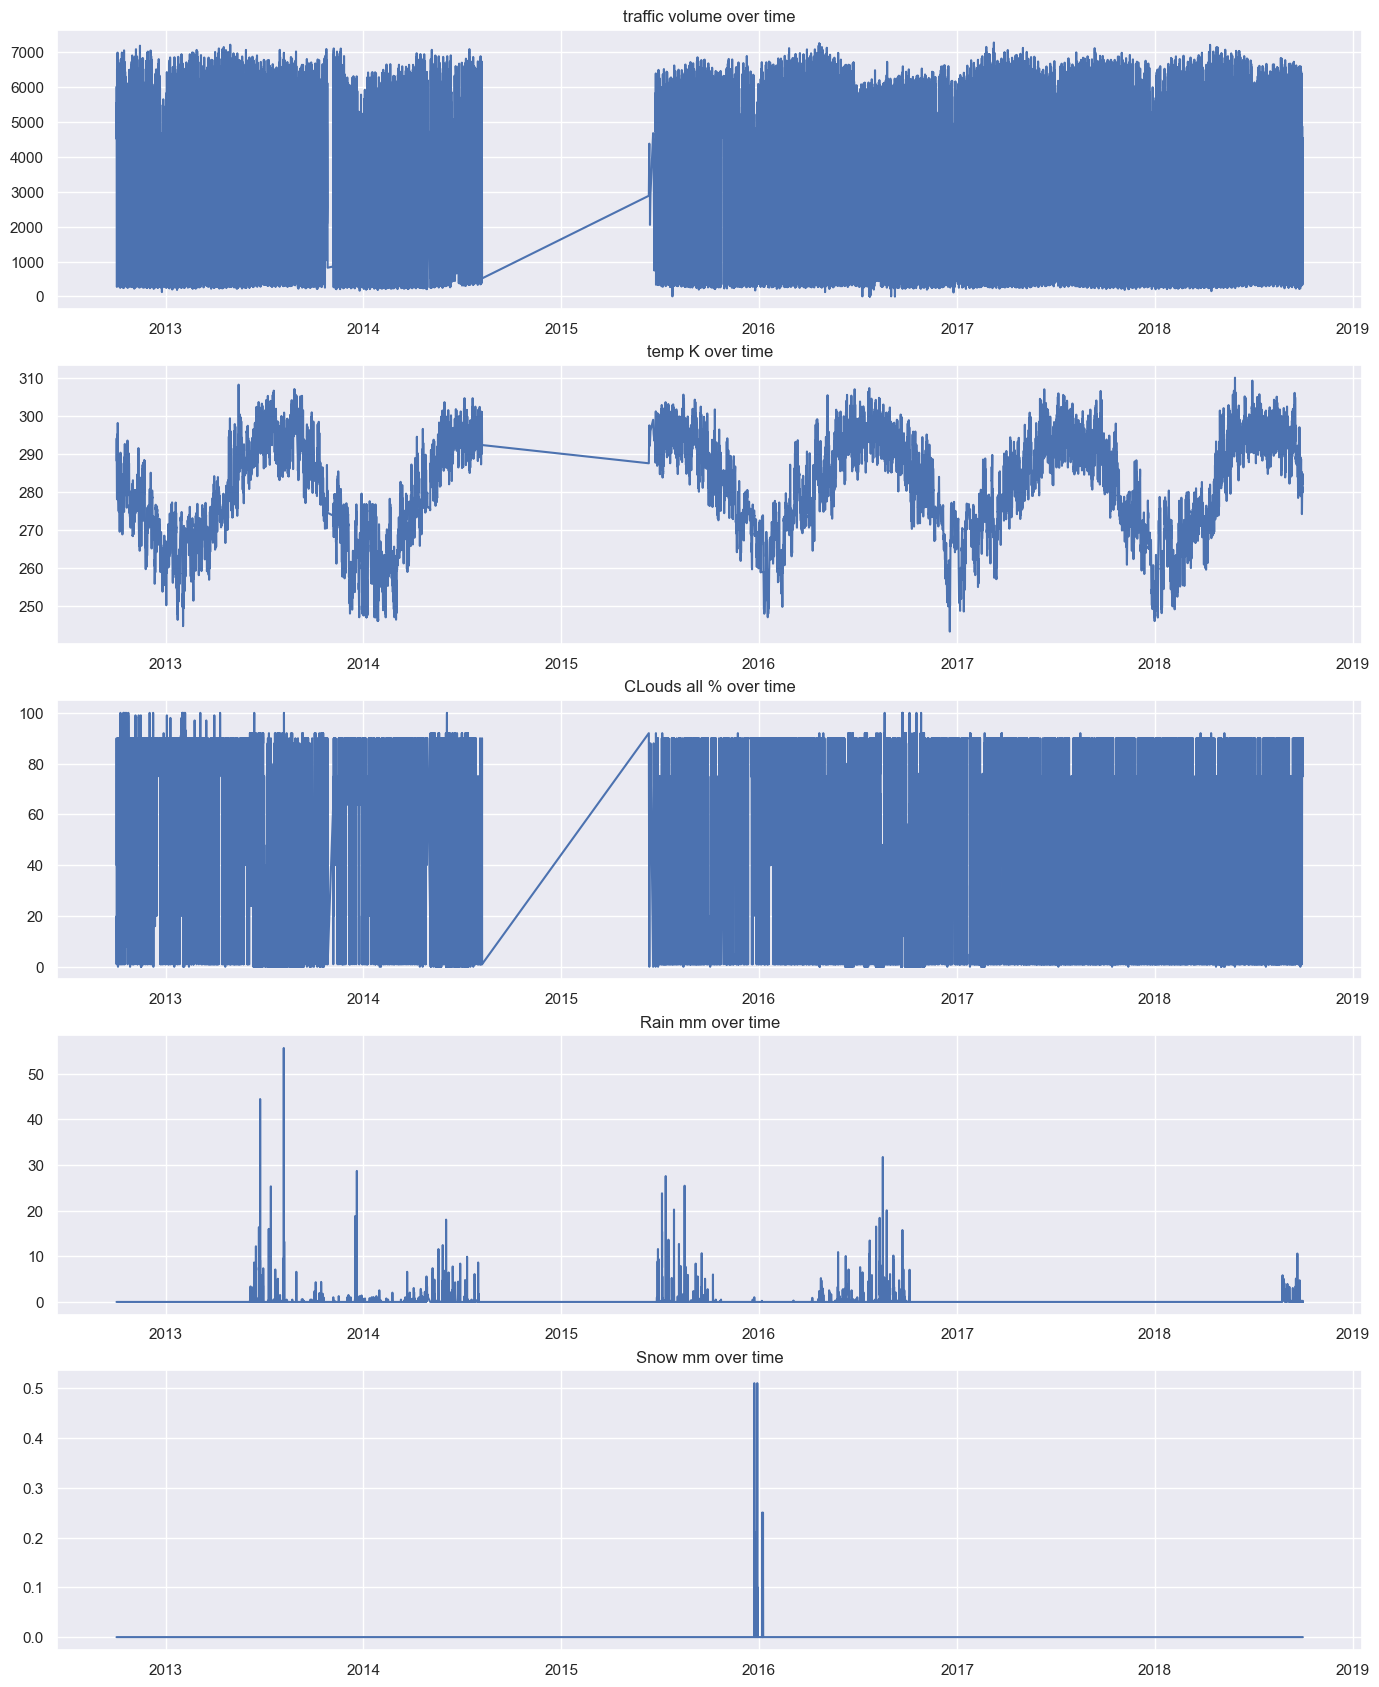

In [25]:
#(4) drop rows, columns: reasonableness over time
# traffic_time = pd.DataFrame(i94[['traffic_volume', 'date_time']])
# i94['date_time'][3]

fig2, axs2 = plt.subplots(5,1, figsize=(15,20))
axs2[0].plot(i94_uniques['date_time'], i94_uniques['traffic_volume'])
axs2[0].set_title('traffic volume over time')
axs2[1].plot(i94_uniques['date_time'], i94_uniques['temp'])
axs2[1].set_title('temp K over time')
axs2[3].plot(i94_uniques['date_time'], i94_uniques['rain_1h'])
axs2[3].set_title('Rain mm over time')
axs2[2].plot(i94_uniques['date_time'], i94_uniques['clouds_all'])
axs2[2].set_title('CLouds all % over time')
axs2[4].plot(i94_uniques['date_time'], i94_uniques['snow_1h'])
axs2[4].set_title('Snow mm over time')


It seems that there is a massive interpolated window around 2015. Let's inspect closer, and if that is the case, it is not representative, we should thus delete all of it.

The rain data is missing for 2013, 2015, half of 2017 and the whole 2018.
The snow data is only recorded briefly in 2016.

In [26]:
#(4) drop rows, columns: reasonableness over time
i94_warning = i94_uniques.copy()
i94_warning['year']=(i94_warning['date_time']).dt.year
i94_warning['month']=(i94_warning['date_time']).dt.month
i94_warning['hour']=(i94_warning['date_time']).dt.hour
i94_warning['dayofweek']=(i94_warning['date_time']).dt.dayofweek
i94_warning['daytime']=(i94_warning['date_time'].dt.hour>=6)&(i94_warning['date_time'].dt.hour<19)
i94_warning['is_holiday']=i94_warning['holiday'].notnull()
i94_warning = i94_warning.drop(['snow_1h','holiday'], axis=1)
i94_warning = i94_warning.rename({'is_holiday':'holiday'}, axis=1)
i94_warning.columns

Index(['temp', 'rain_1h', 'clouds_all', 'weather_main', 'weather_description',
       'date_time', 'traffic_volume', 'date', 'year', 'month', 'hour',
       'dayofweek', 'daytime', 'holiday'],
      dtype='object')

In [27]:
# holiday_dates = i94_warning['holiday'].notnull()

# def creating_holiday(row):
#     if row['date'] in holiday_dates:
#         row['holiday']=1
#     return row

# i94_warning = i94_warning.apply(creating_holiday, axis=1)
i94_warning['holiday'].value_counts(dropna=False)


False    40511
True        53
Name: holiday, dtype: int64

In [28]:
#(4) drop rows, columns: reasonableness over time
i94_warning.set_index('date_time', inplace=True)
bug_start = dt.datetime(2014,8,7,0,0,0)
bug_end = dt.datetime(2015,6,30,0,0,0)
bug_window = i94_warning.loc[bug_start:bug_end]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(bug_window)

,temp,rain_1h,clouds_all,weather_main,weather_description,traffic_volume,date,year,month,hour,dayofweek,daytime,holiday
date_time,,,,,,,,,,,,,
2014-08-07 00:00:00,291.980,0.00,1,clear,sky is clear,725,2014-08-07,2014,8,0,3,False,False
2014-08-07 01:00:00,291.310,0.00,1,mist,mist,471,2014-08-07,2014,8,1,3,False,False
2014-08-07 02:00:00,290.680,0.00,1,clear,sky is clear,381,2014-08-07,2014,8,2,3,False,False
2014-08-07 03:00:00,289.990,0.00,1,mist,mist,424,2014-08-07,2014,8,3,3,False,False
2014-08-07 14:00:00,300.480,0.00,1,clear,sky is clear,5824,2014-08-07,2014,8,14,3,True,False
2014-08-07 15:00:00,300.400,0.00,40,clouds,scattered clouds,6171,2014-08-07,2014,8,15,3,True,False
2014-08-07 16:00:00,300.990,0.00,1,clear,sky is clear,6731,2014-08-07,2014,8,16,3,True,False
2014-08-07 17:00:00,300.480,0.00,1,clear,sky is clear,6278,2014-08-07,2014,8,17,3,True,False
2014-08-07 18:00:00,299.980,0.00,40,clouds,scattered clouds,5121,2014-08-07,2014,8,18,3,True,False


There is indeed missing data between 2014-08-08 and 2015-06-24, and the rain data seems to be even more limited than that. Let's find the exact 2 periods where we have rain in our dataset, and limit our analysis to them.

In [29]:
#(4) drop rows, columns: reasonableness over time for rain
rain_start_1_1 = dt.datetime(2013,6,1,0,0,0)
rain_start_1_2 = dt.datetime(2013,6,8,0,0,0)
guess_start_1 = i94_warning.loc[rain_start_1_1:rain_start_1_2]

(array([15857., 15858., 15859., 15860., 15861., 15862., 15863., 15864.]),
 [Text(15857.0, 0, '2013-06-01'),
  Text(15858.0, 0, '2013-06-02'),
  Text(15859.0, 0, '2013-06-03'),
  Text(15860.0, 0, '2013-06-04'),
  Text(15861.0, 0, '2013-06-05'),
  Text(15862.0, 0, '2013-06-06'),
  Text(15863.0, 0, '2013-06-07'),
  Text(15864.0, 0, '2013-06-08')])

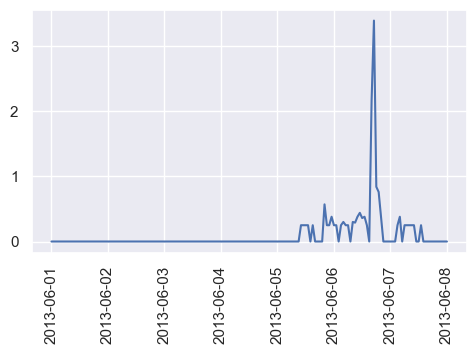

In [30]:
#(4) drop rows, columns: reasonableness over time for rain
fig3, axs3 = plt.subplots(1,1, figsize=(5,3))
axs3.plot(guess_start_1.index, guess_start_1['rain_1h'])
plt.xticks(rotation=90)

So we can assume the pluviometer only starts working for the first time in from 2013-06-05 00:00:00, working all the way to the general glitch on 2014-08-08, comming back online 2015-06-24.

In [31]:
#(4) drop rows, columns: reasonableness over time for rain
rain_finish_2_1 = dt.datetime(2016,10,5,0,0,0)
rain_finish_2_2 = dt.datetime(2016,10,6,0,0,0)
guess_finish_2 = i94_warning.loc[rain_finish_2_1:rain_finish_2_2]


(array([17079.   , 17079.125, 17079.25 , 17079.375, 17079.5  , 17079.625,
        17079.75 , 17079.875, 17080.   ]),
 [Text(17079.0, 0, '10-05 00'),
  Text(17079.125, 0, '10-05 03'),
  Text(17079.25, 0, '10-05 06'),
  Text(17079.375, 0, '10-05 09'),
  Text(17079.5, 0, '10-05 12'),
  Text(17079.625, 0, '10-05 15'),
  Text(17079.75, 0, '10-05 18'),
  Text(17079.875, 0, '10-05 21'),
  Text(17080.0, 0, '10-06 00')])

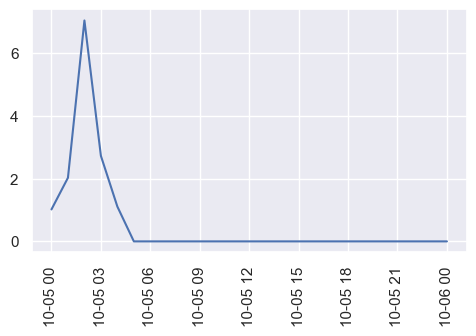

In [32]:
#(4) drop rows, columns: reasonableness over time
fig4, axs4 = plt.subplots(1,1, figsize=(5,3))
axs4.plot(guess_finish_2.index, guess_finish_2['rain_1h'])
plt.xticks(rotation=90)

So the time the pluviometer stopped working for the second time was at dt.datetime(2016,10,5,5,0,0). This gives us two intervals to analyze in the whole data, then: 

* 2013-06-05 00:00:00 - 2014-08-08 00:00:00
* 2015-06-24 00:00:00 - 2016-10-05 05:00:00

In [33]:
#(4) drop rows, columns: reasonableness over time for rain
# limiting the scope of our data
# so that all variables are functional when analyzed
valid = ((i94_warning.index>='2013-06-05 00:00:00')&(i94_warning.index<='2014-08-08 00:00:00')
| (i94_warning.index>='2015-06-24 00:00:00')&(i94_warning.index<='2016-10-05 05:00:00'))
i94_valid = i94_warning.loc[valid]
i94_valid

,temp,rain_1h,clouds_all,weather_main,weather_description,traffic_volume,date,year,month,hour,dayofweek,daytime,holiday
date_time,,,,,,,,,,,,,
2013-06-05 00:00:00,289.630,0.00,90,clouds,overcast clouds,570,2013-06-05,2013,6,0,2,False,False
2013-06-05 01:00:00,289.470,0.00,90,clouds,overcast clouds,375,2013-06-05,2013,6,1,2,False,False
2013-06-05 02:00:00,288.750,0.00,75,clouds,broken clouds,249,2013-06-05,2013,6,2,2,False,False
2013-06-05 03:00:00,288.350,0.00,75,clouds,broken clouds,343,2013-06-05,2013,6,3,2,False,False
2013-06-05 04:00:00,288.180,0.00,75,clouds,broken clouds,788,2013-06-05,2013,6,4,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 01:00:00,288.900,2.03,88,rain,moderate rain,314,2016-10-05,2016,10,1,2,False,False
2016-10-05 02:00:00,287.010,7.05,88,rain,heavy intensity rain,243,2016-10-05,2016,10,2,2,False,False
2016-10-05 03:00:00,286.400,2.73,92,rain,moderate rain,316,2016-10-05,2016,10,3,2,False,False


In [34]:

i94_valid['rain_1h'].mean()

0.15001461659545762

When only considering the periods when the pluviometer worked, the rain average becomes much closer to the official number registered by NOAA (0.17).

In [35]:
#(4) drop rows, columns: reasonableness over time
window_mask = (i94_valid.index>='2015-10-23 06:00:00')&(i94_valid.index<='2015-10-27 12:00:00')

In [36]:
#(4) drop rows, columns: reasonableness over time
window=i94_valid[window_mask]
window

,temp,rain_1h,clouds_all,weather_main,weather_description,traffic_volume,date,year,month,hour,dayofweek,daytime,holiday
date_time,,,,,,,,,,,,,
2015-10-23 06:00:00,284.00,0.0,90,rain,light rain,5525,2015-10-23,2015,10,6,4,True,False
2015-10-23 07:00:00,283.29,0.0,90,rain,heavy intensity rain,5776,2015-10-23,2015,10,7,4,True,False
2015-10-23 09:00:00,282.36,0.0,90,drizzle,light intensity drizzle,4961,2015-10-23,2015,10,9,4,True,False
2015-10-23 10:00:00,282.61,0.0,90,rain,light rain,4667,2015-10-23,2015,10,10,4,True,False
2015-10-23 11:00:00,282.61,0.0,90,rain,moderate rain,5013,2015-10-23,2015,10,11,4,True,False
2015-10-27 08:00:00,281.75,0.0,1,clear,sky is clear,5957,2015-10-27,2015,10,8,1,True,False
2015-10-27 10:00:00,282.58,0.0,1,clear,sky is clear,4549,2015-10-27,2015,10,10,1,True,False
2015-10-27 12:00:00,284.21,0.0,90,clouds,overcast clouds,4780,2015-10-27,2015,10,12,1,True,False


Text(0.5, 1.0, 'Clouds all % over time')

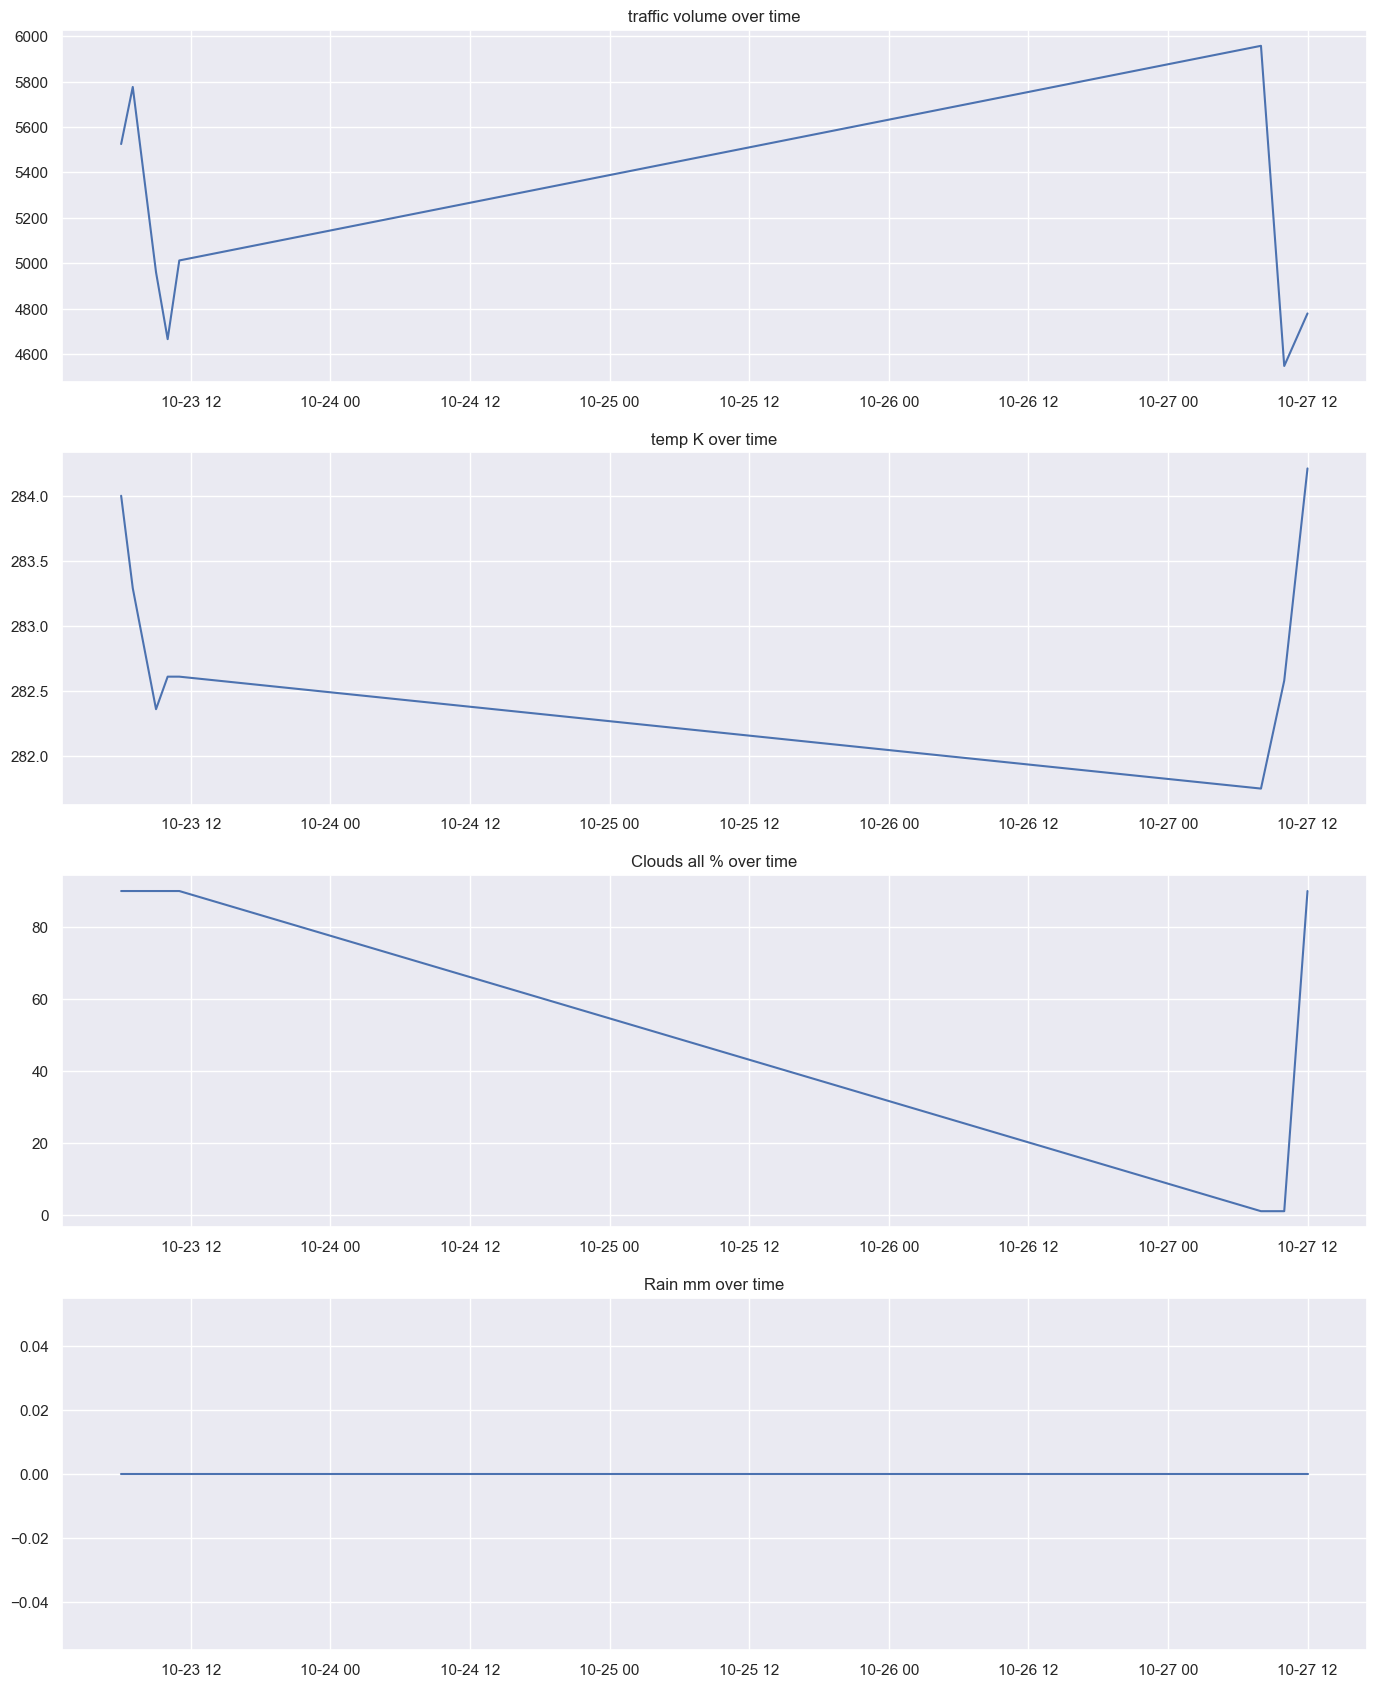

In [37]:
#(4) drop rows, columns: reasonableness over time
fig5, axs5 = plt.subplots(4,1, figsize=(15,20))
axs5[0].plot(window.index, window['traffic_volume'])
axs5[0].set_title('traffic volume over time')
axs5[1].plot(window.index, window['temp'])
axs5[1].set_title('temp K over time')
axs5[3].plot(window.index, window['rain_1h'])
axs5[3].set_title('Rain mm over time')
axs5[2].plot(window.index, window['clouds_all'])
axs5[2].set_title('Clouds all % over time')

There is a small window without registered dates nor data between the 23rd and 27th of Oct, 2015, but the chart automatically interploates it for continuous display. We'll leave this as it is.

However:
* Are weather_main and clouds_all coherent?;
* Are weather description and weather_main coherent?;

In [38]:
#(4) drop rows, columns: reasonableness over time

weather_dict = i94_valid.groupby('weather_main')['weather_description'].value_counts()
weather_dict

weather_main  weather_description             
clear         sky is clear                        5929
clouds        broken clouds                       2322
              overcast clouds                     1987
              scattered clouds                    1549
              few clouds                          1060
drizzle       light intensity drizzle               77
              drizzle                               43
              heavy intensity drizzle                7
fog           fog                                   83
haze          haze                                 282
mist          mist                                1100
rain          light rain                          1590
              moderate rain                        724
              heavy intensity rain                 253
              proximity shower rain                 27
              very heavy rain                       17
              light intensity shower rain            5
smoke         smok

There is perfect coherence between the weather_main and weather_description columns.

In [39]:
clouds_dict= i94_valid.groupby('weather_main')['clouds_all'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(clouds_dict)

weather_main  clouds_all
clear         1             4215
              0             1420
              8              176
              5              118
clouds        90            1749
              75            1152
              40            1141
              64             868
              20             775
              12             179
              92             162
              32             110
              24             106
              36             103
              48              98
              44              97
              68              85
              80              78
              56              76
              88              71
              76              63
              100              5
drizzle       90              88
              92              12
              75              10
              1                7
              40               4
              64               2
              88               2
              32  

There are some incoherences when contrasting 'clouds_all' and 'weather_main': how can we have 'fog', 'thunderstorm', 'mist', 'haze', 'rain', 'drizzle', 'snow'  with 0% or 1% clouds?

This must mean malfuncitoning equipment or that the meters for these variables are not located in the same spot.

However it may be, there is no margin for improving these data, except dropping these oddities.

In [40]:
#weather_main = 'fog'|'thunderstorm'| 'mist'| 'haze'| 'rain'| 'drizzle'| 'snow'
low_clouds = [0,1]

i94_final = i94_valid.drop(i94_valid[(i94_valid['weather_main'] != 'clear')&(i94_valid['clouds_all']<9)].index)
i94_final

,temp,rain_1h,clouds_all,weather_main,weather_description,traffic_volume,date,year,month,hour,dayofweek,daytime,holiday
date_time,,,,,,,,,,,,,
2013-06-05 00:00:00,289.630,0.00,90,clouds,overcast clouds,570,2013-06-05,2013,6,0,2,False,False
2013-06-05 01:00:00,289.470,0.00,90,clouds,overcast clouds,375,2013-06-05,2013,6,1,2,False,False
2013-06-05 02:00:00,288.750,0.00,75,clouds,broken clouds,249,2013-06-05,2013,6,2,2,False,False
2013-06-05 03:00:00,288.350,0.00,75,clouds,broken clouds,343,2013-06-05,2013,6,3,2,False,False
2013-06-05 04:00:00,288.180,0.00,75,clouds,broken clouds,788,2013-06-05,2013,6,4,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 01:00:00,288.900,2.03,88,rain,moderate rain,314,2016-10-05,2016,10,1,2,False,False
2016-10-05 02:00:00,287.010,7.05,88,rain,heavy intensity rain,243,2016-10-05,2016,10,2,2,False,False
2016-10-05 03:00:00,286.400,2.73,92,rain,moderate rain,316,2016-10-05,2016,10,3,2,False,False


In [41]:
i94_final['holiday'].value_counts(dropna=False)

False    16916
True        23
Name: holiday, dtype: int64

In [42]:
# holidays = i94_final[i94_final['holiday']]['date']
# # '2013-07-04' in holidays
holiday_dates = []
def new_holiday(row):    
    if row['holiday']:
        holiday_dates.append(row['date'])
    if row['date'] in holiday_dates:
        row['holiday']=True
    else:
        row['holiday']=False
    return row

i94_final= i94_final.apply(new_holiday, axis=1)
i94_final['holiday'].sum()

462

Summarizing the exploration and cleanup in this section:

* Initial data had 48k entries, apparently no missing data;
* convert date_time colum into datetime object;
* convert all string columns into lower case;
* Dropped snow column;
* Dropped 17 fully duplicated rows, but over 7k data entries with repeated 'date_time' values;
* One major data gap:  2014-08-08 - 2015-06-24;
* One minor data gap: 2015-10-23 - 2015-10-27;
* Valid intervals: 2013-06-05...2014-08-08, 2015-06-24...2016-10-05, 17.8k entries;
* colums 'weather_main' and 'weather_description' are coherent;
* Deleted rows where there was a weather condition combined with clouds less than 9%,  16.9k entries in the final data.

## 6. Data Visualization and Analysis<a name="section6"></a>

* 1 Correlation heatmap
* 2 Group variables by hour, daytime/nighttime, weekday/weekend, month
* 3 Compare traffic with holiday, vacation, weather conditions

In [43]:
grouped_hour = i94_final.pivot_table(['traffic_volume', 'rain_1h', 'clouds_all', 'temp', 'holiday', 'dayofweek'], 'hour')


Given that the only variable with a normal distribution in our chart is temperature, while most others are multimodal, skewed or ordinal, the apropriate correlation coefficient would be Pearson's, [as per this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#:~:text=In%20summary%2C%20correlation%20coefficients%20are,otherwise%20use%20Spearman's%20correlation%20coefficient.)

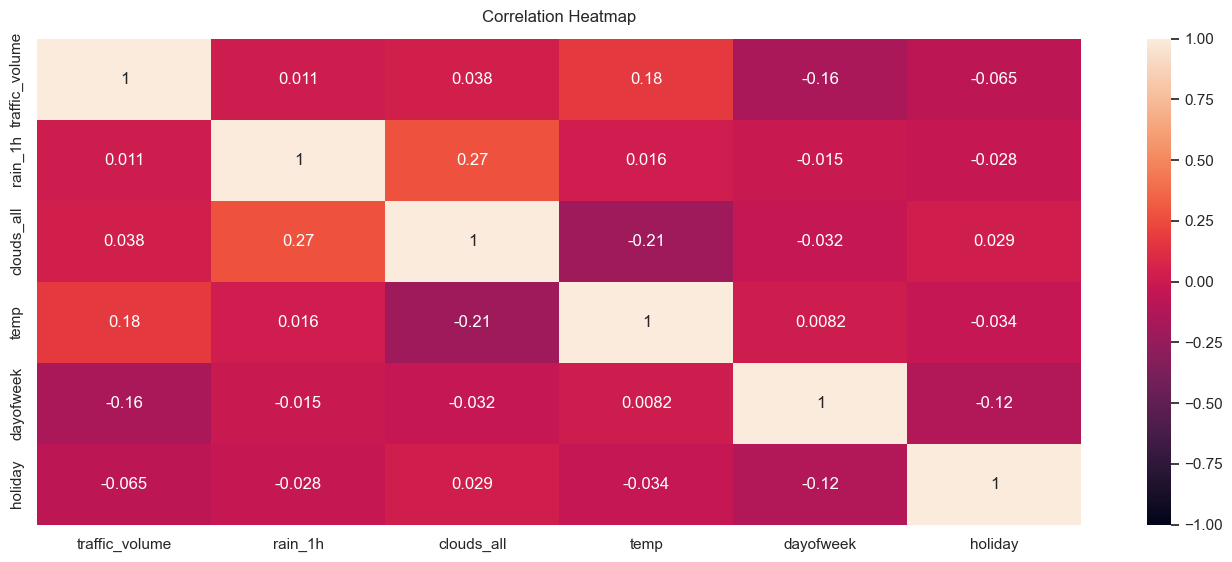

In [44]:
# (1) Correlation heatmap
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(i94_final[['traffic_volume', 'rain_1h', 'clouds_all', 'temp', 'dayofweek', 'holiday']].corr(method='spearman'),vmin=-1, vmax=1, annot = True)#, 
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap.png',dpi=300, bbox_inches='tight')

There is no strong correlation between any of the analyzed variables, which is weird: one would expect a decent correlation between rain and cloud coverage, or temperature and cloud coverage, or rain and traffic_volume, or dayofweek and traffic volume, or holiday and traffic volume.

(30.0, 50.0)

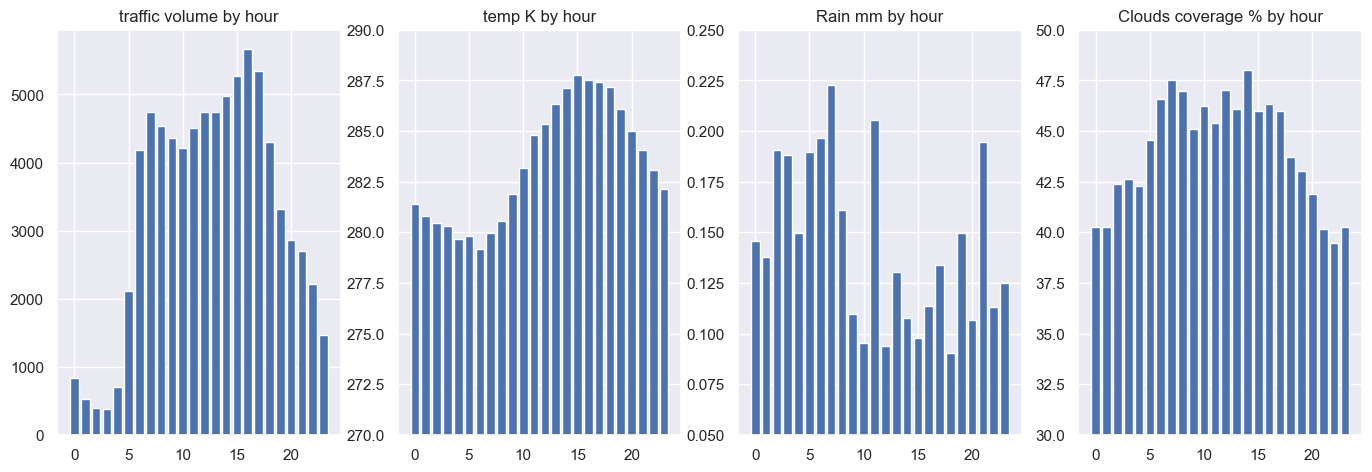

In [45]:
# (2).1 Variables by hour
fig6, axs6 = plt.subplots(1,4, figsize=(15,5))
axs6[0].bar(grouped_hour.index, grouped_hour['traffic_volume'])
axs6[0].set_title('traffic volume by hour')
axs6[1].bar(grouped_hour.index, grouped_hour['temp'])
axs6[1].set_title('temp K by hour')
axs6[1].set_ylim([270,290])
axs6[2].bar(grouped_hour.index, grouped_hour['rain_1h'])
axs6[2].set_title('Rain mm by hour')
axs6[2].set_ylim([0.05, 0.25])
axs6[3].bar(grouped_hour.index, grouped_hour['clouds_all'])
axs6[3].set_title('Clouds coverage % by hour')
axs6[3].set_ylim([30,50])
# axs6[]
#i94_final.groupby('hour')['traffic_volume'].mean().plot(kind='bar')

We can observe interesting patterns when it comes to the quantitatives variables in our dataset. Traffic starts congestioning at 6 and decreases from 17h onwards.
Temperature presents a senoidal behavior with a drought at 6am and peaking at 15h.
Precipitation is stronger in the first 6 hours of the day, although at 11h and 21h it is also remarkably high.
Cloud coverage is higher during working hours, suggesting it has something to do with traffic.

Let's split the data into day and nighttime data, so we can better observe the effects of the variables into traffic.

In [46]:
# 2 Group variables by daytime/nighttime
nighttime_mask=i94_final['daytime']==False
daytime_mask = i94_final['daytime']==True
daytime_data = i94_final[daytime_mask]
nighttime_data = i94_final[nighttime_mask]

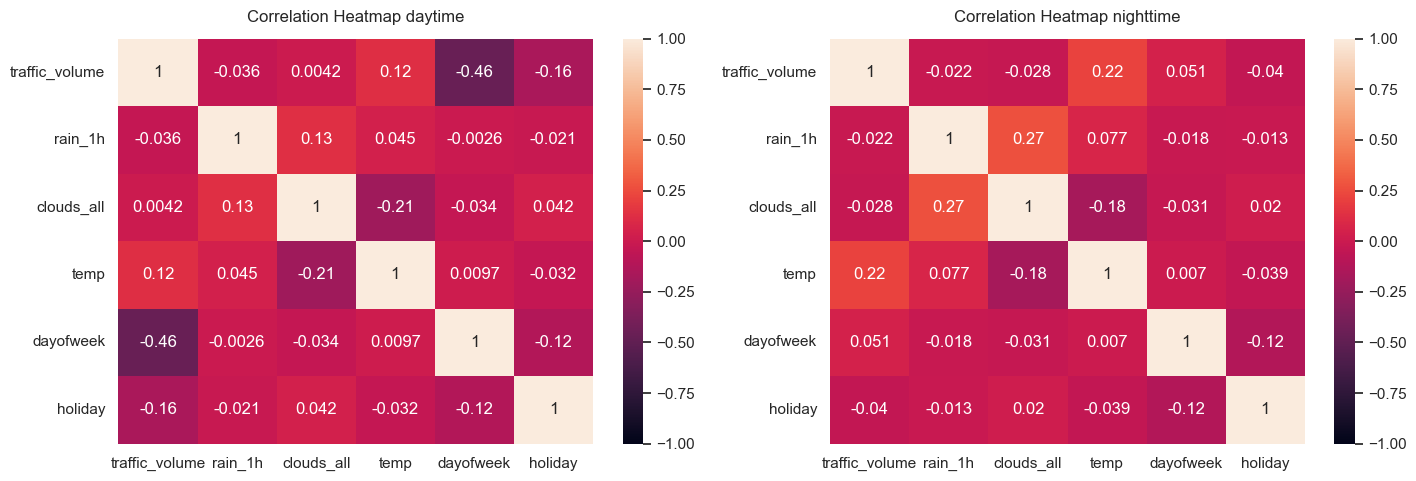

In [47]:
# (1) Correlation heatmap for daytime
fig7, axs7 = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(daytime_data[['traffic_volume', 'rain_1h', 'clouds_all', 'temp', 'dayofweek', 'holiday']].corr(method='spearman'),ax=axs7[0],vmin=-1, vmax=1, annot = True)
axs7[0].set_title('Correlation Heatmap daytime',fontdict={'fontsize':12}, pad=12)

sns.heatmap(nighttime_data[['traffic_volume', 'rain_1h', 'clouds_all', 'temp', 'dayofweek', 'holiday']].corr(method='spearman'),ax=axs7[1],vmin=-1, vmax=1, annot = True)
axs7[1].set_title('Correlation Heatmap nighttime',fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap2.png',dpi=300, bbox_inches='tight')
plt.show()

After splitting the data into daytime and nighttime, we can see stronger correlation between dayofweek/traffic volume and a decent one between cloud coverage/temperature during daytime.

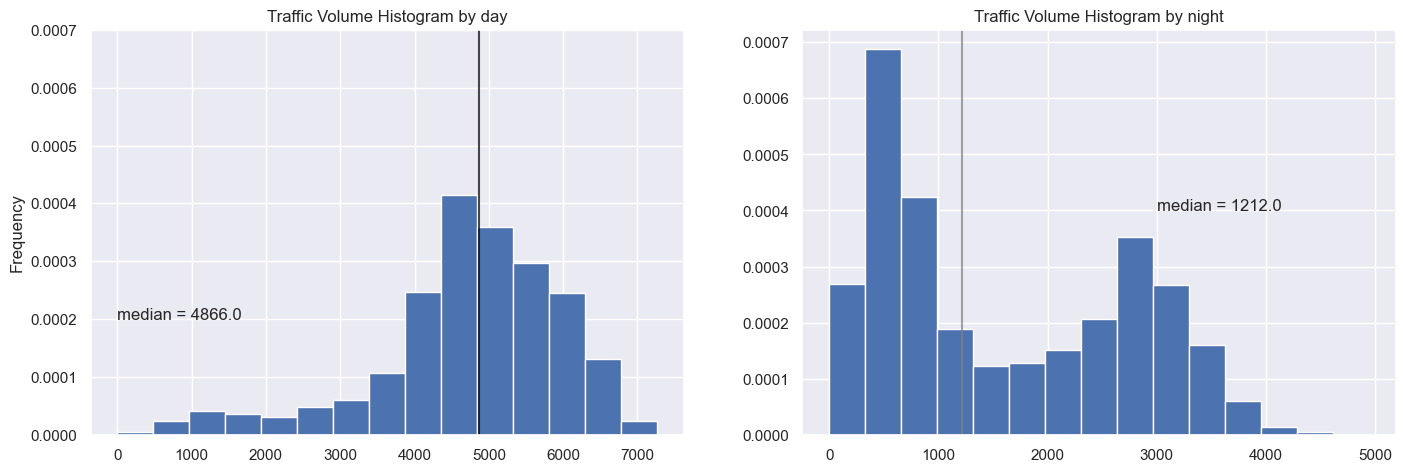

In [48]:
#2 group traffic by daytime
fig8, axs8 = plt.subplots(1,2, figsize=(15,5))
axs8[0].hist(daytime_data['traffic_volume'], bins=15, density=True)
axs8[0].set_ylabel('Frequency')
axs8[0].set_title('Traffic Volume Histogram by day')
axs8[0].set_ylim([0,0.0007])
axs8[0].text(0,0.0002,f"median = {daytime_data['traffic_volume'].median()}", size=12)
axs8[0].axvline(daytime_data['traffic_volume'].median(), color='black', alpha=0.7)
axs8[1].hist(nighttime_data['traffic_volume'], bins=15, density=True)
axs8[1].set_title('Traffic Volume Histogram by night')
axs8[1].text(3000,0.0004,f"median = {nighttime_data['traffic_volume'].median()}", size=12)
axs8[1].axvline(nighttime_data['traffic_volume'].median(), color='gray', alpha=0.7)

For the daytime data, there is a normal distribution of traffic volume with a median of 4866, whereas for the nighttime data, that value is 1212, representing a commonly fluid traffic.

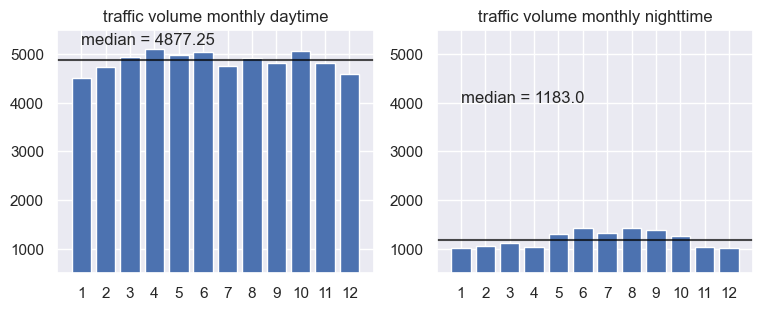

In [49]:
# 2.1 Group traffic by month
grouped_monthly_day = daytime_data.pivot_table(['traffic_volume', 'rain_1h', 'clouds_all', 'temp'], 'month', aggfunc=np.median)
grouped_monthly_night = nighttime_data.pivot_table(['traffic_volume', 'rain_1h', 'clouds_all', 'temp'], 'month', aggfunc=np.median)
fig9, axs9 = plt.subplots(1,2, figsize=(8,3))
axs9[0].bar(grouped_monthly_day.index, grouped_monthly_day['traffic_volume'])
axs9[0].set_title('traffic volume monthly daytime')
axs9[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs9[0].set_ylim([500,5500])

axs9[1].bar(grouped_monthly_night.index, grouped_monthly_night['traffic_volume'])
axs9[1].set_title('traffic volume monthly nighttime')
axs9[1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs9[1].set_ylim([500,5500])

axs9[0].text(1,5200,f"median = {grouped_monthly_day['traffic_volume'].median()}", size=12, )
axs9[0].axhline(grouped_monthly_day['traffic_volume'].median(),color='black', alpha=0.7)
axs9[1].text(1,4000,f"median = {grouped_monthly_night['traffic_volume'].median()}", size=12, )
axs9[1].axhline(grouped_monthly_night['traffic_volume'].median(),color='black', alpha=0.7)
plt.show()



We can observe the traffic volume variation throughout the year. In colder months traffic really plummets, compared to the warmer months when it picks up quickly. There is also a decreasing tendency around July and August, probably due to vacation period. Interesting to keep in mind that we have in our data 2 winters, 2 springs, 3 autumns, 4 summers, so we gathered less data for May and June than July and August.

Text(4.5, 4000, 'median = 1198.5')

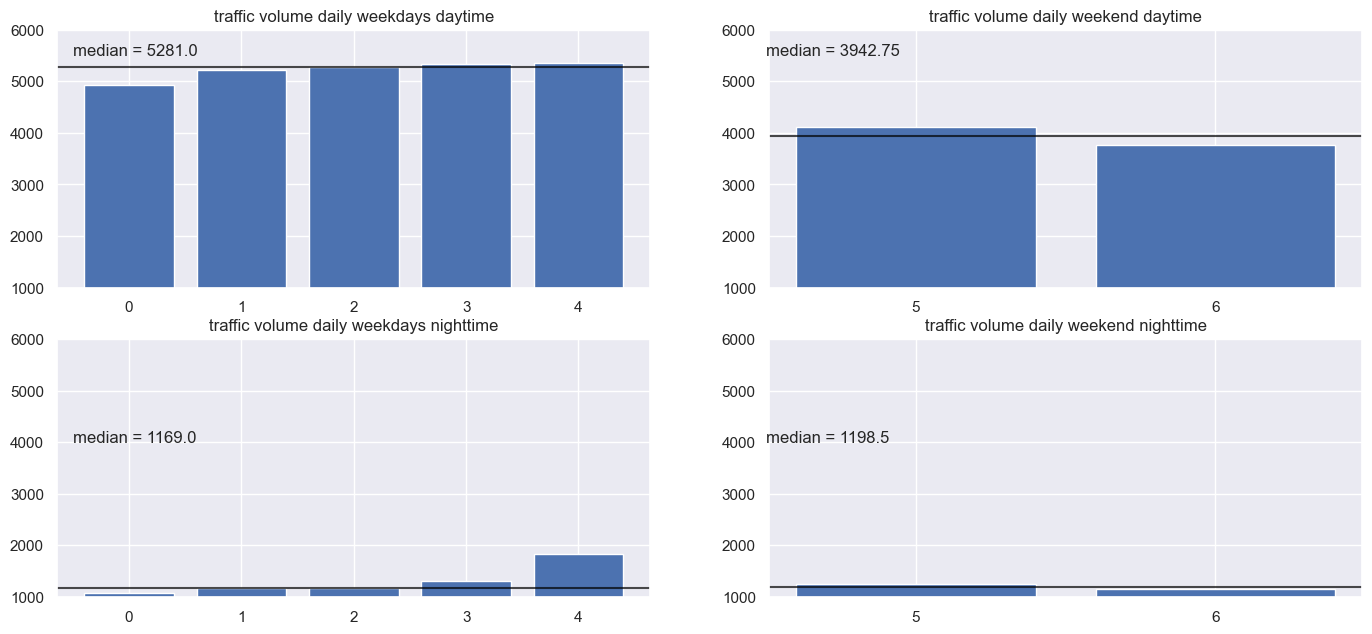

In [50]:
#2 Group variables by weekday


grouped_daily_day = daytime_data.pivot_table(['traffic_volume', 'rain_1h', 'clouds_all', 'temp'], 'dayofweek', aggfunc=np.median)
grouped_daily_night = nighttime_data.pivot_table(['traffic_volume', 'rain_1h', 'clouds_all', 'temp'], 'dayofweek', aggfunc=np.median)

weekdays_day = grouped_daily_day[grouped_daily_day.index<=4]
weekend_day = grouped_daily_day[grouped_daily_day.index>4]

weekdays_night = grouped_daily_night[grouped_daily_night.index<=4]
weekend_night = grouped_daily_night[grouped_daily_night.index>4]

fig10, axs10 = plt.subplots(2,2, figsize=(15,7))
axs10[0,0].bar(weekdays_day.index, weekdays_day['traffic_volume'])
axs10[0,0].set_title('traffic volume daily weekdays daytime')
axs10[0,0].set_xticks([0,1,2,3,4])
axs10[0,0].set_ylim([1000,6000])
axs10[0,0].axhline(weekdays_day['traffic_volume'].median(), color='black', alpha=0.7)
axs10[0,1].bar(weekend_day.index, weekend_day['traffic_volume'])
axs10[0,1].set_title('traffic volume daily weekend daytime')
axs10[0,1].set_xticks([5,6])
axs10[0,1].set_ylim([1000,6000])
axs10[0,1].axhline(weekend_day['traffic_volume'].median(), color='black', alpha=0.7)
axs10[1,0].bar(weekdays_night.index, weekdays_night['traffic_volume'])
axs10[1,0].set_title('traffic volume daily weekdays nighttime')
axs10[1,0].set_xticks([0,1,2,3,4])
axs10[1,0].set_ylim([1000,6000])
axs10[1,0].axhline(weekdays_night['traffic_volume'].median(), color='black', alpha=0.7)
axs10[1,1].bar(weekend_night.index, weekend_night['traffic_volume'])
axs10[1,1].set_title('traffic volume daily weekend nighttime')
axs10[1,1].set_xticks([5,6])
axs10[1,1].set_ylim([1000,6000])
axs10[1,1].axhline(weekend_night['traffic_volume'].median(), color='black', alpha=0.7)

axs10[0,0].text(-0.5, 5500,f"median = {weekdays_day['traffic_volume'].median()}", size=12)
axs10[0,1].text( 4.5,5500,f"median = {weekend_day['traffic_volume'].median()}", size=12)
axs10[1,0].text(-0.5,4000, f"median = {weekdays_night['traffic_volume'].median()}", size=12)
axs10[1,1].text(4.5, 4000, f"median = {weekend_night['traffic_volume'].median()}", size=12)


We can notice that daytime traffic is over four times heavier than nighttime's. For both day and night during the week, traffic basically increases until peaking on Fridays. It might be due folks leaving in a city and spending their weekends on another town.

Traffic on Saturday night is actually the second heaviest during the week, reinforcing the suggestion above.

In [51]:
daytime_data['holiday'].sum()

252

Text(5, 3000, 'median = 1264.0')

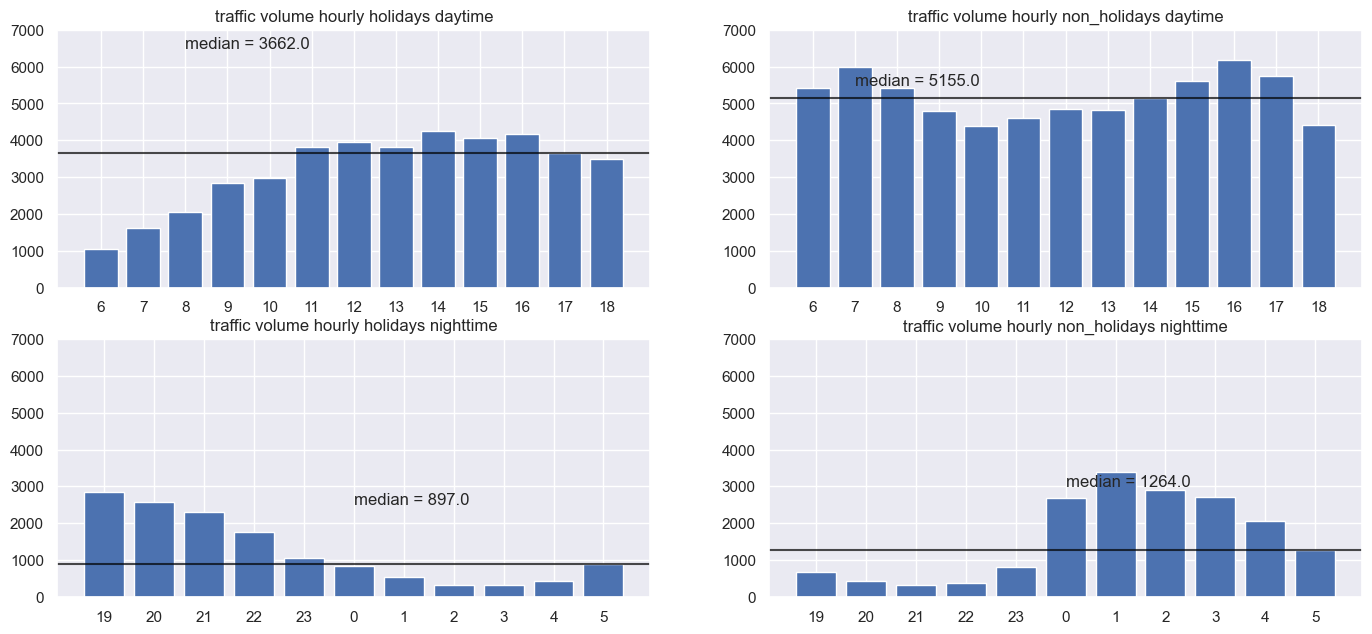

In [52]:
# 3 Compare traffic with holiday, vacation, weather condition


holiday_day = daytime_data[daytime_data['holiday']]
holiday_night = nighttime_data[nighttime_data['holiday']]

non_holiday_day = daytime_data[~(daytime_data['holiday'])]
non_holiday_night = nighttime_data[~(nighttime_data['holiday'])]

 
holiday_day_hourly = holiday_day.groupby('hour').median(numeric_only=True)
holiday_night_hourly = holiday_night.groupby('hour').median(numeric_only=True).reset_index()#.reindex([19,20,21,22,23,0,1,2,3,4,5])

non_holiday_day_hourly = non_holiday_day.groupby('hour').median(numeric_only=True)
non_holiday_night_hourly = non_holiday_night.groupby('hour').median(numeric_only=True).reset_index()#.reindex([19,20,21,22,23,0,1,2,3,4,5])

hol_night = holiday_night_hourly[(holiday_night_hourly['hour']>18) & (holiday_night_hourly['hour']<24)]
hol_mad = holiday_night_hourly[(holiday_night_hourly['hour']<6)]
hol_night_hourly_right = pd.concat([hol_night,hol_mad])

non_hol_night = non_holiday_night_hourly[(non_holiday_night_hourly['hour']>18)&(non_holiday_night_hourly['hour']<24)]
non_hol_mad = non_holiday_night_hourly[(non_holiday_night_hourly['hour']<6)]
non_hol_night_hourly_right = pd.concat([non_hol_night, non_hol_mad])

fig11, axs11 = plt.subplots(2,2, figsize=(15,7))
axs11[0,0].bar(holiday_day_hourly.index, holiday_day_hourly['traffic_volume'])
axs11[0,0].set_title('traffic volume hourly holidays daytime')
axs11[0,0].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs11[0,0].set_ylim([0,7000])
axs11[0,0].axhline(holiday_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs11[0,1].bar(non_holiday_day_hourly.index, non_holiday_day_hourly['traffic_volume'])
axs11[0,1].set_title('traffic volume hourly non_holidays daytime')
axs11[0,1].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs11[0,1].set_ylim([0,7000])
axs11[0,1].axhline(non_holiday_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs11[1,0].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], hol_night_hourly_right['traffic_volume'])
axs11[1,0].set_title('traffic volume hourly holidays nighttime')
# axs11[1,0].set_xticks([19,20,21,22,23,0,1,2,3,4,5])
axs11[1,0].set_ylim([0,7000])
axs11[1,0].axhline(hol_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
axs11[1,1].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], non_holiday_night_hourly['traffic_volume'])
axs11[1,1].set_title('traffic volume hourly non_holidays nighttime')
# axs11[1,1].set_xticks([19,20,21,22,23,0,1,2,3,4,5])
axs11[1,1].set_ylim([0,7000])
axs11[1,1].axhline(non_holiday_night_hourly['traffic_volume'].median(), color='black', alpha=0.7)

axs11[0,1].text(7, 5500,f"median = {non_holiday_day_hourly['traffic_volume'].median()}", size=12)
axs11[0,0].text(8,6500,f"median = {holiday_day_hourly['traffic_volume'].median()}", size=12)
axs11[1,0].text(5,2500, f"median = {hol_night_hourly_right['traffic_volume'].median()}", size=12)
axs11[1,1].text(5, 3000, f"median = {non_holiday_night_hourly['traffic_volume'].median()}", size=12)

We can see not only the traffic naturally decreases on holidays by 30%, the pattern of traffic changes as well, peaking at 16 hours without the 7h peak.

In [53]:
# 3 Group by vacation
vacation_day_mask=(daytime_data['month']==7)|(daytime_data['month']==8)
non_vacation_day_mask = (daytime_data['month']!=7)&(daytime_data['month']!=8)
vacation_night_mask=(nighttime_data['month']==7)|(nighttime_data['month']==8)
non_vacation_night_mask = (nighttime_data['month']!=7)&(nighttime_data['month']!=8)


Text(5, 3000, 'median = 1239.0')

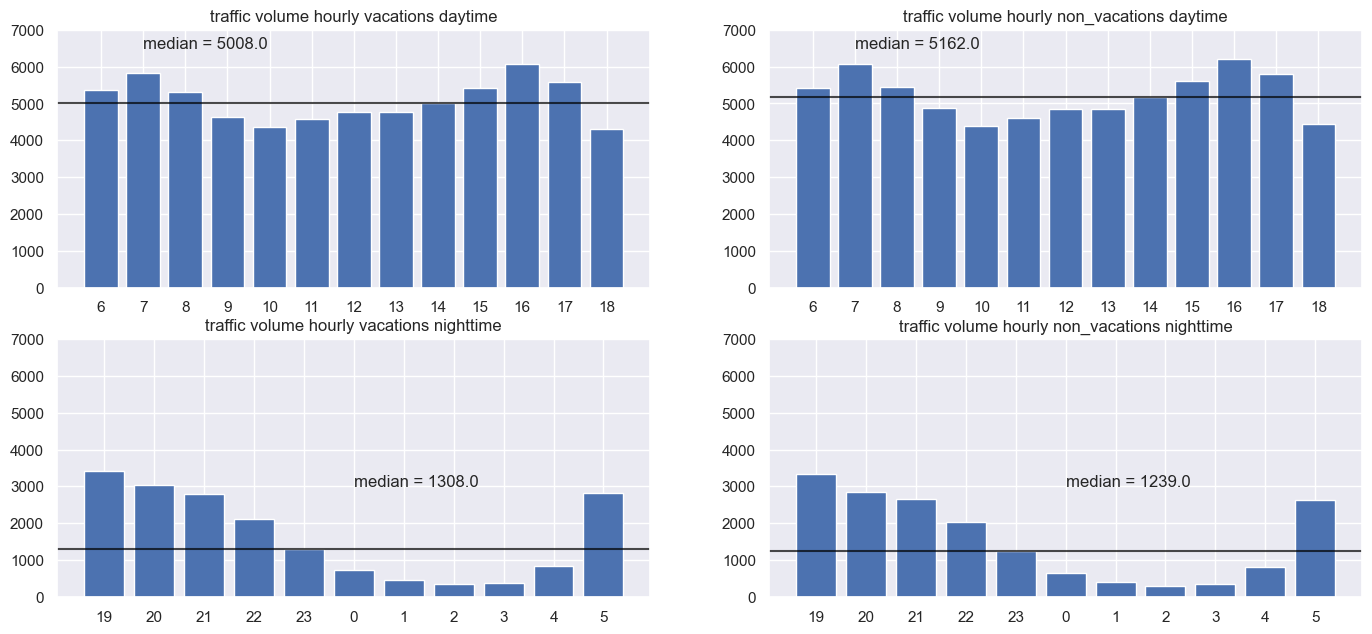

In [54]:
# 3 Compare traffic by vacation

vacation_day = daytime_data[vacation_day_mask]
vacation_night = nighttime_data[vacation_night_mask]

non_vacation_day = daytime_data[non_vacation_day_mask]
non_vacation_night = nighttime_data[non_vacation_night_mask]
 
vacation_day_hourly = vacation_day.groupby('hour').median(numeric_only=True)
vacation_night_hourly = vacation_night.groupby('hour').median(numeric_only=True).reset_index()

non_vacation_day_hourly = non_vacation_day.groupby('hour').median(numeric_only=True)
non_vacation_night_hourly = non_vacation_night.groupby('hour').median(numeric_only=True).reset_index()

vac_night = vacation_night_hourly[(vacation_night_hourly['hour']>18) & (vacation_night_hourly['hour']<24)]
vac_mad = vacation_night_hourly[(vacation_night_hourly['hour']<6)]
vac_night_hourly_right = pd.concat([vac_night,vac_mad])

non_vac_night = non_vacation_night_hourly[(non_vacation_night_hourly['hour']>18)&(non_vacation_night_hourly['hour']<24)]
non_vac_mad = non_vacation_night_hourly[(non_vacation_night_hourly['hour']<6)]
non_vac_night_hourly_right = pd.concat([non_vac_night, non_vac_mad])

fig12, axs12 = plt.subplots(2,2, figsize=(15,7))
axs12[0,0].bar(vacation_day_hourly.index, vacation_day_hourly['traffic_volume'])
axs12[0,0].set_title('traffic volume hourly vacations daytime')
axs12[0,0].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs12[0,0].set_ylim([0,7000])
axs12[0,0].axhline(vacation_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs12[0,1].bar(non_vacation_day_hourly.index, non_vacation_day_hourly['traffic_volume'])
axs12[0,1].set_title('traffic volume hourly non_vacations daytime')
axs12[0,1].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs12[0,1].set_ylim([0,7000])
axs12[0,1].axhline(non_vacation_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs12[1,0].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], vac_night_hourly_right['traffic_volume'])
axs12[1,0].set_title('traffic volume hourly vacations nighttime')
axs12[1,0].set_ylim([0,7000])
axs12[1,0].axhline(vac_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
axs12[1,1].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], non_vac_night_hourly_right['traffic_volume'])
axs12[1,1].set_title('traffic volume hourly non_vacations nighttime')
axs12[1,1].set_ylim([0,7000])
axs12[1,1].axhline(non_vac_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)


axs12[0,0].text(7, 6500,f"median = {vacation_day_hourly['traffic_volume'].median()}", size=12)
axs12[0,1].text( 7,6500,f"median = {non_vacation_day_hourly['traffic_volume'].median()}", size=12)
axs12[1,0].text(5,3000, f"median = {vacation_night_hourly['traffic_volume'].median()}", size=12)
axs12[1,1].text(5, 3000, f"median = {non_vacation_night_hourly['traffic_volume'].median()}", size=12)

Interestingly, setting the vacation period between July and August, our data doesn't show significant variations of patterns or absolute values between vacation/non-vacation.

In [55]:
# 3 Group by weather
dry_day_mask=(daytime_data['weather_main']=='clear')|(daytime_data['weather_main']=='clouds')
moist_day_mask = (daytime_data['weather_main']=='drizzle')|(daytime_data['weather_main']=='mist')
opaque_day_mask = (daytime_data['weather_main']=='haze')|(daytime_data['weather_main']=='fog')|(daytime_data['weather_main']=='smoke')
precip_day_mask=(daytime_data['weather_main']=='rain')|(daytime_data['weather_main']=='thunderstorm')
snow_day_mask = (daytime_data['weather_main']=='snow')

dry_night_mask=(nighttime_data['weather_main']=='clear')|(nighttime_data['weather_main']=='clouds')
moist_night_mask = (nighttime_data['weather_main']=='drizzle')|(nighttime_data['weather_main']=='mist')
opaque_night_mask = (nighttime_data['weather_main']=='haze')|(nighttime_data['weather_main']=='fog')|(nighttime_data['weather_main']=='smoke')
precip_night_mask=(nighttime_data['weather_main']=='rain')|(nighttime_data['weather_main']=='thunderstorm')
snow_night_mask = (nighttime_data['weather_main']=='snow')


# daytime_mask = i94_final['daytime']==True
# daytime_data = i94_final[daytime_mask]
# nighttime_data = i94_final[nighttime_mask]

Text(7, 6500, 'median = 1035.0')

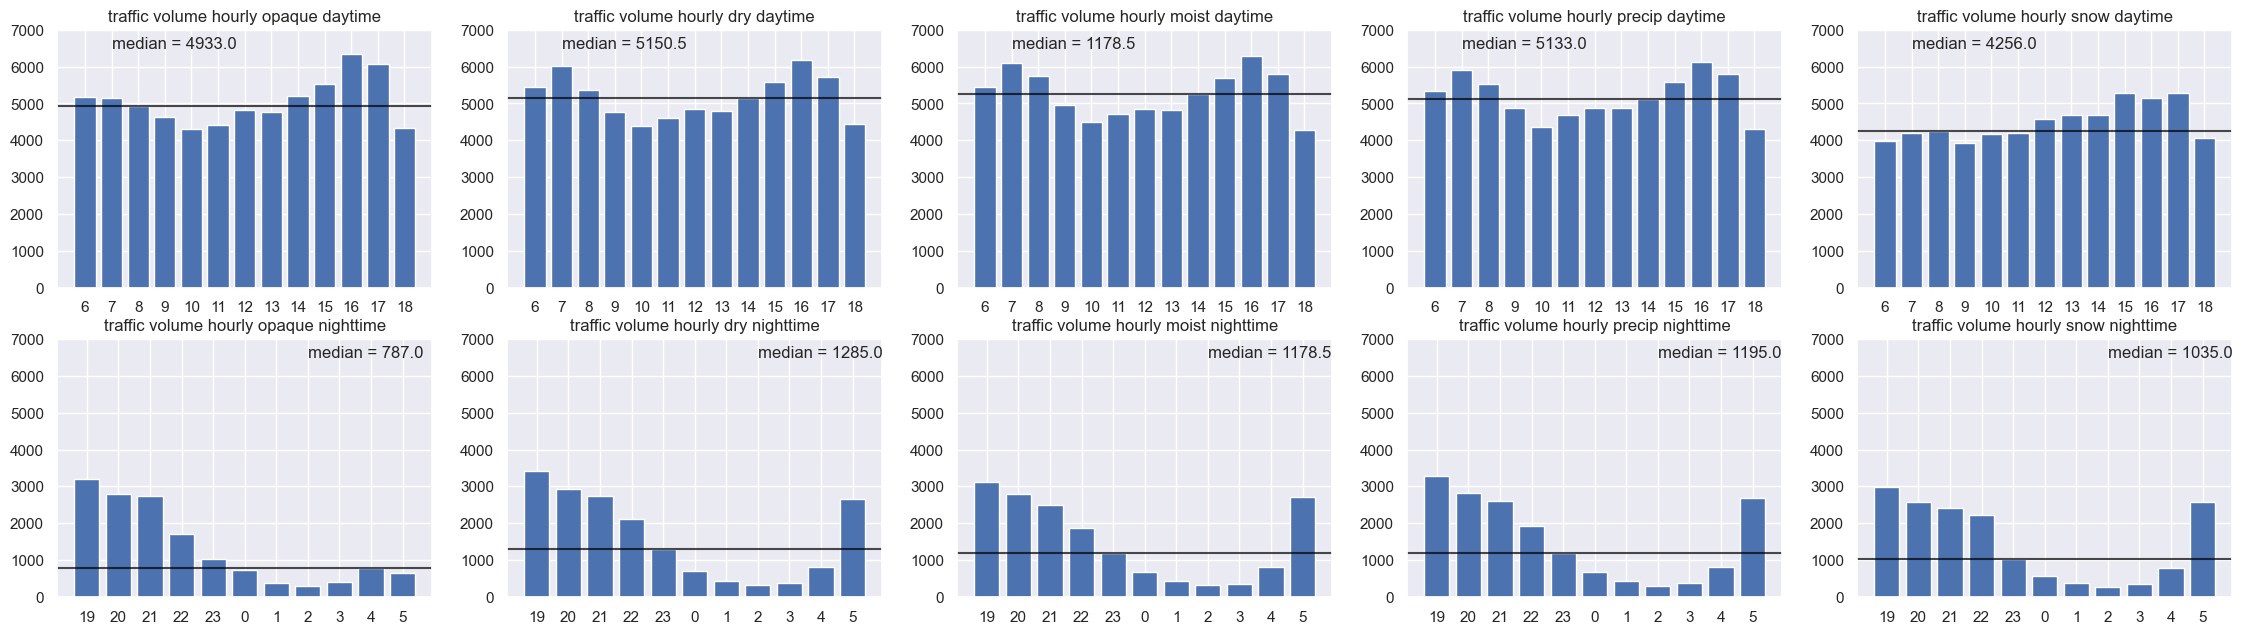

In [56]:
# 3 Compare traffic by weather

opaque_day = daytime_data[opaque_day_mask]
opaque_night = nighttime_data[opaque_night_mask]

dry_day = daytime_data[dry_day_mask]
dry_night = nighttime_data[dry_night_mask]

moist_day = daytime_data[moist_day_mask]
moist_night = nighttime_data[moist_night_mask]

precip_day = daytime_data[precip_day_mask]
precip_night = nighttime_data[precip_night_mask]

snow_day = daytime_data[snow_day_mask]
snow_night = nighttime_data[snow_night_mask]

opaque_day_hourly = opaque_day.groupby('hour').median(numeric_only=True)
opaque_night_hourly=opaque_night.groupby('hour').median(numeric_only=True).reset_index()
op_night = opaque_night_hourly[(opaque_night_hourly['hour']>18) & (opaque_night_hourly['hour']<24)]
op_mad = opaque_night_hourly[(opaque_night_hourly['hour']<6)]
op_night_hourly_right = pd.concat([op_night,op_mad])


dry_day_hourly=dry_day.groupby('hour').median(numeric_only=True)
dry_night_hourly=dry_night.groupby('hour').median(numeric_only=True).reset_index()
dry_night = dry_night_hourly[(dry_night_hourly['hour']>18) & (dry_night_hourly['hour']<24)]
dry_mad = dry_night_hourly[(dry_night_hourly['hour']<6)]
dry_night_hourly_right = pd.concat([dry_night,dry_mad])

moist_day_hourly=moist_day.groupby('hour').median(numeric_only=True)
moist_night_hourly=moist_night.groupby('hour').median(numeric_only=True).reset_index()
moist_night = moist_night_hourly[(moist_night_hourly['hour']>18) & (moist_night_hourly['hour']<24)]
moist_mad = moist_night_hourly[(moist_night_hourly['hour']<6)]
moist_night_hourly_right = pd.concat([moist_night,moist_mad])

precip_day_hourly=precip_day.groupby('hour').median(numeric_only=True)
precip_night_hourly=precip_night.groupby('hour').median(numeric_only=True).reset_index()
p_night = precip_night_hourly[(precip_night_hourly['hour']>18) & (precip_night_hourly['hour']<24)]
p_mad = precip_night_hourly[(precip_night_hourly['hour']<6)]
p_night_hourly_right = pd.concat([p_night,p_mad])

snow_day_hourly=snow_day.groupby('hour').median(numeric_only=True)
snow_night_hourly=snow_night.groupby('hour').median(numeric_only=True).reset_index()
s_night = snow_night_hourly[(snow_night_hourly['hour']>18) & (snow_night_hourly['hour']<24)]
s_mad = snow_night_hourly[(snow_night_hourly['hour']<6)]
s_night_hourly_right = pd.concat([s_night,s_mad])
 

fig13, axs13 = plt.subplots(2,5, figsize=(25,7))
axs13[0,0].bar(opaque_day_hourly.index, opaque_day_hourly['traffic_volume'])
axs13[0,0].set_title('traffic volume hourly opaque daytime')
axs13[0,0].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs13[0,0].set_ylim([0,7000])
axs13[0,0].axhline(opaque_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs13[1,0].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], op_night_hourly_right['traffic_volume'])
axs13[1,0].set_title('traffic volume hourly opaque nighttime')
axs13[1,0].set_ylim([0,7000])
axs13[1,0].axhline(op_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
axs13[0,1].bar(dry_day_hourly.index, dry_day_hourly['traffic_volume'])
axs13[0,1].set_title('traffic volume hourly dry daytime')
axs13[0,1].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs13[0,1].set_ylim([0,7000])
axs13[0,1].axhline(dry_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs13[1,1].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], dry_night_hourly_right['traffic_volume'])
axs13[1,1].set_title('traffic volume hourly dry nighttime')
axs13[1,1].set_ylim([0,7000])
axs13[1,1].axhline(dry_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
axs13[0,2].bar(moist_day_hourly.index, moist_day_hourly['traffic_volume'])
axs13[0,2].set_title('traffic volume hourly moist daytime')
axs13[0,2].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs13[0,2].set_ylim([0,7000])
axs13[0,2].axhline(moist_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs13[1,2].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], moist_night_hourly_right['traffic_volume'])
axs13[1,2].set_title('traffic volume hourly moist nighttime')
axs13[1,2].set_ylim([0,7000])
axs13[1,2].axhline(moist_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
axs13[0,3].bar(precip_day_hourly.index, precip_day_hourly['traffic_volume'])
axs13[0,3].set_title('traffic volume hourly precip daytime')
axs13[0,3].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs13[0,3].set_ylim([0,7000])
axs13[0,3].axhline(precip_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs13[1,3].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], p_night_hourly_right['traffic_volume'])
axs13[1,3].set_title('traffic volume hourly precip nighttime')
axs13[1,3].set_ylim([0,7000])
axs13[1,3].axhline(p_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
axs13[0,4].bar(snow_day_hourly.index, snow_day_hourly['traffic_volume'])
axs13[0,4].set_title('traffic volume hourly snow daytime')
axs13[0,4].set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18])
axs13[0,4].set_ylim([0,7000])
axs13[0,4].axhline(snow_day_hourly['traffic_volume'].median(), color='black', alpha=0.7)
axs13[1,4].bar(['19','20','21', '22', '23', '0', '1','2','3','4','5'], s_night_hourly_right['traffic_volume'])
axs13[1,4].set_title('traffic volume hourly snow nighttime')
axs13[1,4].set_ylim([0,7000])
axs13[1,4].axhline(s_night_hourly_right['traffic_volume'].median(), color='black', alpha=0.7)
#4933.0 5150.5 5245.5 5133.0 4256.0
axs13[0,0].text(7, 6500,f"median = {opaque_day_hourly['traffic_volume'].median()}", size=12)
axs13[0,1].text( 7,6500,f"median = {dry_day_hourly['traffic_volume'].median()}", size=12)
axs13[0,2].text(7,6500, f"median = {moist_night_hourly['traffic_volume'].median()}", size=12)
axs13[0,3].text(7, 6500, f"median = {precip_day_hourly['traffic_volume'].median()}", size=12)
axs13[0,4].text(7, 6500, f"median = {snow_day_hourly['traffic_volume'].median()}", size=12)
#787.0 1285.0 1178.5 1195.0 1035.0
axs13[1,0].text(7, 6500,f"median = {opaque_night_hourly['traffic_volume'].median()}", size=12)
axs13[1,1].text( 7,6500,f"median = {dry_night_hourly['traffic_volume'].median()}", size=12)
axs13[1,2].text(7,6500, f"median = {moist_night_hourly['traffic_volume'].median()}", size=12)
axs13[1,3].text(7, 6500, f"median = {precip_night_hourly['traffic_volume'].median()}", size=12)
axs13[1,4].text(7, 6500, f"median = {snow_night_hourly['traffic_volume'].median()}", size=12)

## 7. Conclusion<a name="section7"></a>

In this project, we managed to extract real data from the I94 connection the twin cities of St Paul and Minneapolis and observe how the traffic correlates to different variables:

* We noticed a strong correlation during daytime between day of the week and traffic volume, and a decent one between cloud coverage and temperature. At night, there are no strong correlations.
* Traffic is over 3x as heavy comparing day and night times;
* As a rule, colder months present a little less traffic than hotter months, but July and August are not as busy as the other hot months;
* During the day, traffic during week days is 25% heavier than traffic on weekends. At night, weekends are actually heavier on traffic than weekdays;
* Holidays reduce traffic on I94 around 25%;
* Vacation period doesn't actually influence the patterns of traffic in I94, either by day or night.
* When it snows there is usually 16% less traffic than other weather conditions. Other than that, it doesn't vary much regardless of rain of limited visibility.

Next steps:

* Since there was no correlation between measured rain and traffic, we could simply ignore the failed rain data and expand our selection, enabling a more abundant data for our analysis.